![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Librerias & Google Drive

Para empezar carguemos esas librerias que nos hacen falta

In [ ]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

Incorporamos la carpeta de Google Drive para poder "guardar" nuestros modelos

1. Abrir barra lateral de Carpeta
2.  Hacer click en carpeta con logo de Google Drive


In [ ]:
# # Aquí iria el codigo para conectarse a Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Cargar la parte de extraccion de features de VGG16

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model

# Creemos una red que será extracción de features basada en VGG16 entrenada con ImageNet

model_vgg16 = vgg16.VGG16(include_top = False,      # no queremos parte de salida porque es la clasificacion de otras imagenes
                          weights = 'imagenet',
                          input_shape = (32,32,3),
                          )

In [ ]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
output = model_vgg16.layers[-1].output  # cojo la ultima capa y monto su output
output

<KerasTensor: shape=(None, 1, 1, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
output_layer = ks.layers.Flatten()(output)
output_layer

<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'flatten_1')>

In [ ]:
final_vgg16 = Model(model_vgg16.input, output_layer)

In [ ]:
final_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
# Veamos como va lo de "congelar" capas de entrenamiento, es para que los pesos no los cambie
final_vgg16.trainable

True

In [ ]:
pd.set_option('max_colwidth', True)

In [ ]:
layers = [(layer, layer.name, layer.trainable) for layer in final_vgg16.layers]

In [ ]:
pd.DataFrame(layers, columns=['Layer', 'Layer Name', 'Is Trainable?'])

,Layer,Layer Name,Is Trainable?
0,<keras.src.engine.input_layer.InputLayer object at 0x7e46b59135b0>,input_2,True
1,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46b5913f40>,block1_conv1,True
2,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46b597ce20>,block1_conv2,True
3,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e46b597f8e0>,block1_pool,True
4,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a063b940>,block2_conv1,True
5,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a065fca0>,block2_conv2,True
6,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e46a065f850>,block2_pool,True
7,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a065feb0>,block3_conv1,True
8,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a05ed420>,block3_conv2,True
9,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a05edcc0>,block3_conv3,True


In [ ]:
# quiero que las primera hasta llegar a block3_conv1 sean false, y luego true
# quiero que sean false porque quiero congelarlas a partir del bloque 3 porque es cuando empiezan con las textuaras, es un dato que no me quiero traer

entrenable = False

for layer in final_vgg16.layers:
  if layer.name == 'block3_conv1':
    entrenable = True
  layer.trainable = entrenable

In [ ]:
# comprobamos
layers = [(layer, layer.name, layer.trainable) for layer in final_vgg16.layers]
pd.DataFrame(layers, columns=['Layer', 'Layer Name', 'Is Trainable?'])

,Layer,Layer Name,Is Trainable?
0,<keras.src.engine.input_layer.InputLayer object at 0x7e46b59135b0>,input_2,False
1,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46b5913f40>,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46b597ce20>,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e46b597f8e0>,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a063b940>,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a065fca0>,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e46a065f850>,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a065feb0>,block3_conv1,True
8,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a05ed420>,block3_conv2,True
9,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e46a05edcc0>,block3_conv3,True


In [ ]:
from keras.regularizers import l2

In [ ]:
model_post_vgg = ks.Sequential()

model_post_vgg.add(final_vgg16)
model_post_vgg.add(Dense(500, activation='relu', kernel_regularizer=l2(0.00001)))
model_post_vgg.add(Dropout(0.5))
model_post_vgg.add(Dense(10, activation='softmax'))

In [ ]:
model_post_vgg

## 3. Optimizador, función error


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.optimizers import SGD
# esto lo hago por el weight dacay

new_sgd = SGD(learning_rate=0.01, momentum=0.9)
model_post_vgg.compile(loss='sparse_categorical_crossentropy', optimizer=new_sgd, metrics=['accuracy'])

# Encoding de etiquetas

## 4. Preparamos los datos

Cargamos los datos de CIFAR10 de los datasets directamente de las librerias de Keras. Estos ya estan dispuestos en train and test

**Detalle importante:**
> La red neuronal requiere que los inputs sean números reales, y lo haremos forzando la division de los valores de dentro de las matrices 28x28 (que tienen valoress del 0 al 255) por 255.0 (un real)

In [ ]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled, x_test_scaled = x_train / 255.0, x_test / 255.0

In [ ]:
print("Etiquetas de train:", y_train)


# Convertir los datos en arrays de una dimension (vectores) es una buena mejora en el dataset
y_train = y_train.ravel()
y_test = y_test.ravel()


print("Etiquetas de train (en vector):", y_train)


Etiquetas de train: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Etiquetas de train (en vector): [6 9 9 ... 9 1 1]


Obtenemos un array con todas las labels de CIFAR10

In [ ]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Pintemos una muestra de las imagenes del dataset CIFAR10, a ver si se parece en algo a lo que esperamos.
Primero, vemos que tipos de datos tengo, después mapeamos esas matrices en una escala de grises utilizando el método **.get_cmap()** de PlotLy con los nueve primeros números del dataset.

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


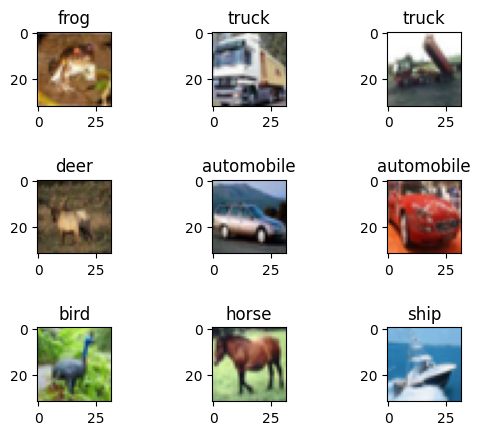

In [ ]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train[i]])

plt.subplots_adjust(hspace = 1)
plt.show()

Como vamos a querer ir haciendo validación a la vez que entrenamos (muy practico)

Cuando añadimos convoluciones, necesitamos "pre-tratar los datos", porque **la convolución espera una matriz de 4 campos** (más parecido a "imagenes"), en el caso de MNIST. CIFAR10 ya tiene el shape adecuado, así que no tenemos que hacer nada, pero como siempre decimos: es mejor que comprobeis su tamaño.

Por eso, al salir de la Convolution, hay que hacer un Flatten, porque las capas FullDense esperan arrays, no matrices!!

Luego lo imprimimos para ver que todo está correcto

In [ ]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val_scaled.shape, y_val.shape))

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)


# Data gen

In [ ]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 15, horizontal_flip = True,
    width_shift_range=0.12,height_shift_range=0.12)

train_generator = train_datagen.flow(
    x_train, y_train,batch_size=30)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(
    x_val, y_val,batch_size=20)

## 5. Entrenamiento

Ya podemos ponernos a entrenar el modelo!! Ojo, que hemos de entrenar contra los datos convertidos al formato que espera la Convolution.

Empezaremos con 30 epocs, es decir, 30 pasadas completas del dataset (que a su vez sera con mini-batches internamente), fijando un batch de 64

El metodo .fit() nos permite, definir además si disponemos de varias CPUs, GPUs, y si queremos ir validando datos a cada fin de epoch.

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model_post_vgg.fit(train_generator, epochs=300,
                             validation_data = validation_generator,
                            batch_size = 256, callbacks=[callback])

Epoch 1/300
1334/1334 [==============================] - 58s 38ms/step - loss: 1.5466 - accuracy: 0.4491 - val_loss: 1.3689 - val_accuracy: 0.5803
Epoch 2/300
1334/1334 [==============================] - 47s 35ms/step - loss: 1.1037 - accuracy: 0.6365 - val_loss: 0.8849 - val_accuracy: 0.7125
Epoch 3/300
1334/1334 [==============================] - 48s 36ms/step - loss: 0.9452 - accuracy: 0.6928 - val_loss: 0.8214 - val_accuracy: 0.7379
Epoch 4/300
1334/1334 [==============================] - 46s 34ms/step - loss: 0.8408 - accuracy: 0.7293 - val_loss: 0.7153 - val_accuracy: 0.7662
Epoch 5/300
1334/1334 [==============================] - 47s 35ms/step - loss: 0.7716 - accuracy: 0.7498 - val_loss: 0.6917 - val_accuracy: 0.7833
Epoch 6/300
1334/1334 [==============================] - 46s 35ms/step - loss: 0.7110 - accuracy: 0.7732 - val_loss: 0.6902 - val_accuracy: 0.7844
Epoch 7/300
1334/1334 [==============================] - 46s 34ms/step - loss: 0.6793 - accuracy: 0.7829 - val_loss: 0

In [ ]:
t = time.perf_counter()

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.009509


## 6. Evaluamos los resultados

Obtengamos una grafica de como el error y la accuracy van evolucionando en cada epoch en los datos de entrenamiento y en la validación

In [ ]:
_, acc = model_post_vgg.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 82.720


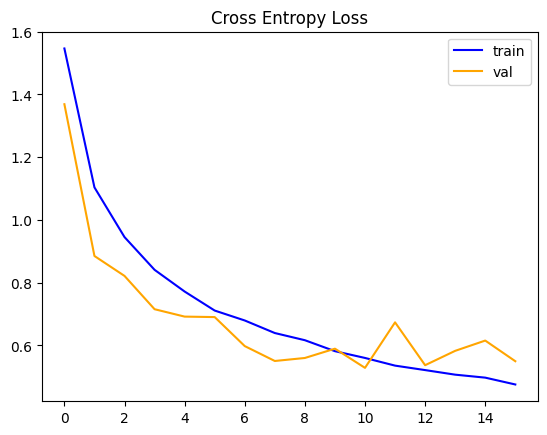

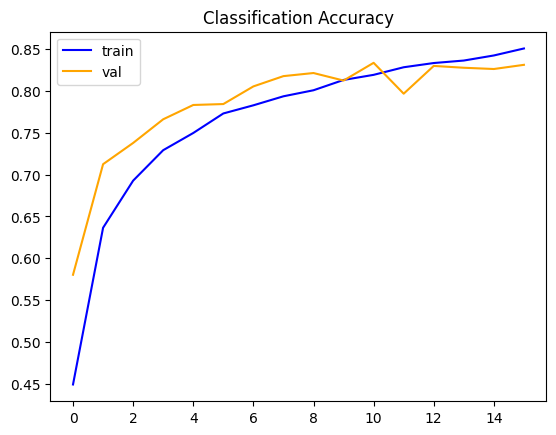

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

El coste podemos ver que es estable y es en el epoch 15 que se fija en un valor. Además la accuracy baila alrededor de 0.10. No se puede decir que sea un modelo muy bueno.

Veamos que tipo de predicciones estoy obteniendo sobre el conjunto de test (vamos a pintar las imagenes y sus clasificaciones)

In [ ]:
predictions = model_post_vgg.predict(x_test)

313/313 [==============================] - 2s 7ms/step


Una de las ventajas de Python es que hay montones de funciones y código realizado por terceras personas. Aquí me he fusilado unas bonitas funciones (que he adaptado un poco a mis necesidades) para poder pintar las imagenes, su label (ground truth) y las clasificaciones que hemos realizado.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Dibujamos las primeras imagenes, con las predicciones y sus valores reales (un total de 20 imagenes, para no abusar de vuestros laptops)

Coloreamos las prediciones correctas en azul y los fallos en rojo. Aunque primero he impreso las etiquetas para que tengamos una referencia al grafico.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


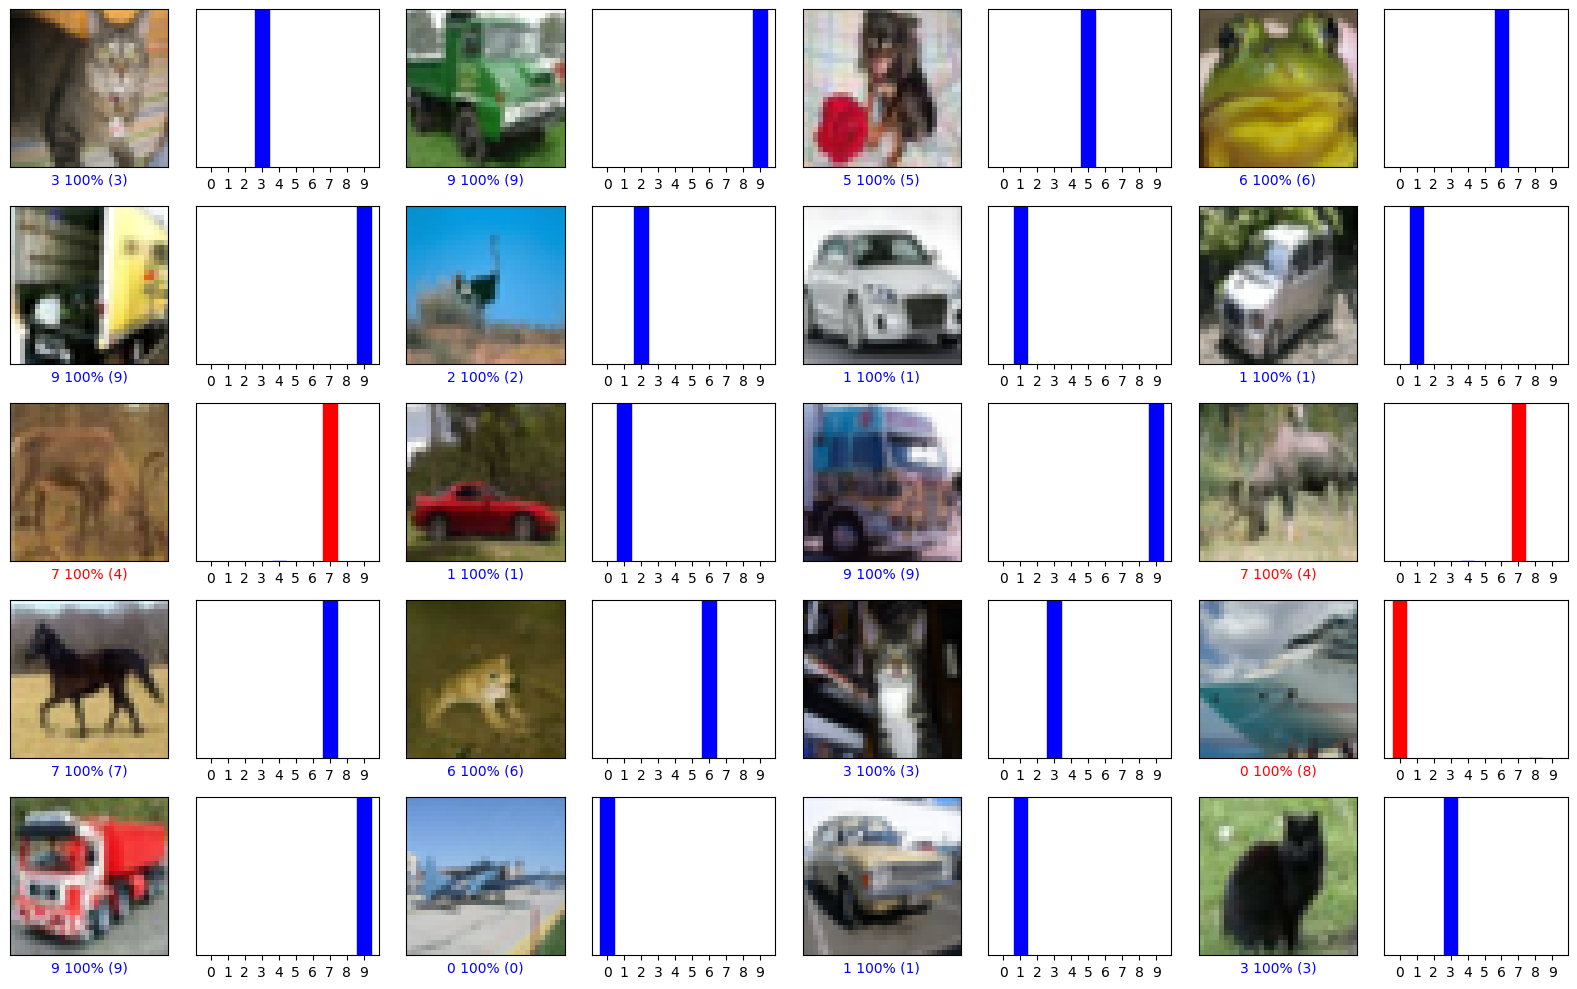

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. Guardamos el modelo para futuras evaluaciones

Id cambiando los nombres del archivo para ir guardando los diversos proyectos.
Aquí lo guardamos en "local", pero recordad que lo ideal es que lo guardeis en Google Drive (teneis que montar la unidad, fijar la ruta y allí guardar el modelo .h5)

In [ ]:
ruta_googledrive = "/content/drive/MyDrive/Nuclio/M7. Deep Learning/Entregable 4/" # A revisar en vuestra instancia

# model.save(ruta_googledrive+'cifar10_base_model.h5')